In [69]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import mean
from numpy import std

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [15]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

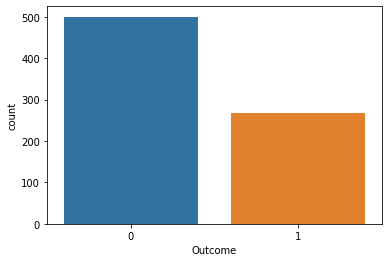

In [38]:
sns.countplot(x='Outcome', data=df)
plt.show()

In [21]:
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [22]:
X = df.drop(columns='Outcome')
Y = df['Outcome']

In [23]:
scaler = StandardScaler()

In [24]:
X_scaler = scaler.fit_transform(X)

In [25]:
X_scaler

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [31]:
X_train,X_test,Y_train,Y_test = train_test_split(X_scaler,Y, test_size = 0.2,random_state=46,stratify=Y)

In [37]:
Y_test.value_counts()

0    100
1     54
Name: Outcome, dtype: int64

# Use SVM

In [39]:
classifier = svm.SVC(kernel='linear')

In [40]:
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

In [47]:
predict_svm = classifier.predict(X_test)

In [48]:
accuracy_score(predict_svm,Y_test)

0.7857142857142857

# Use Random Forest Classifier

In [51]:
rfc = RandomForestClassifier(n_estimators=500)

In [52]:
rfc.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=500)

In [55]:
predict_rfc = rfc.predict(X_test)

In [56]:
accuracy_score(predict_rfc,Y_test)

0.7987012987012987

# Use XGBoost

In [74]:
xg = XGBClassifier()

# Use Simple XGBoost

In [75]:
xg.fit(X_train,Y_train)

[16:14:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


d:\program file\python\allenv\envlatihan\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [76]:
predict_xg = xg.predict(X_test)

In [77]:
accuracy_score(predict_xg,Y_test)

0.7402597402597403

## Use CV From Skleran For XGBoost

In [78]:
cv = RepeatedStratifiedKFold(n_splits=50, n_repeats=3, random_state=1)
n_scores = cross_val_score(xg, X_train, Y_train, scoring='accuracy', cv=cv, n_jobs=-1)

In [79]:
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.722 (0.124)


# Use CV From XGBoost

In [80]:
data_dmatrix = xgb.DMatrix(data=X,label=Y)

In [85]:
params = {"objective":"binary:logistic",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}
cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

In [86]:
cv_results

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,0.494034,0.000244,0.495361,0.000281
1,0.487375,0.001179,0.489912,0.000561
2,0.481594,0.001738,0.484699,0.001917
3,0.474573,0.005620,0.479842,0.004500
4,0.468016,0.008619,0.474411,0.005696
5,0.462272,0.006753,0.468742,0.005164
6,0.456279,0.008258,0.464548,0.005763
7,0.452269,0.008445,0.461077,0.005803
8,0.449648,0.008122,0.459099,0.005043
9,0.443441,0.009186,0.454460,0.003994
